In [5]:
import pandas as pd
from matplotlib import pyplot as plt



def plot_from_csv(file_path, start_ch, end_ch):
    df = pd.read_csv(file_path, header=None)
    
    plt.figure(figsize=(12, 10))
    
    selected_channels = df.iloc[start_ch:end_ch]
    print(f"Plotting channels: {start_ch} to {end_ch}")
    
    for idx, (ch, row) in enumerate(selected_channels.iterrows()):
        avg_value = row.mean()
        print(f"Trace {ch}: Average Value = {avg_value:.2f}")
        add_baseline = 300 * idx  # Incremental baseline for visibility
        plt.plot(row.values + add_baseline, lw=0.5)
    
    plt.xlabel('Time (samples)')
    plt.ylabel('Current w/artificial baselines (ADC)')
    plt.ylim(0, 20000)  # Fix y-scale from 0 to 20000
    plt.show()

Plotting channels: 0 to 99
Trace 0: Average Value = 4929.44
Trace 1: Average Value = 4938.07
Trace 2: Average Value = 4972.18
Trace 3: Average Value = 4926.21
Trace 4: Average Value = 5385.16
Trace 5: Average Value = 4933.85
Trace 6: Average Value = 4926.40
Trace 7: Average Value = 4929.37
Trace 8: Average Value = 4931.96
Trace 9: Average Value = 4929.76
Trace 10: Average Value = 4932.30
Trace 11: Average Value = 5385.72
Trace 12: Average Value = 4939.48
Trace 13: Average Value = 4940.69
Trace 14: Average Value = 4931.82
Trace 15: Average Value = 4931.56
Trace 16: Average Value = 5386.52
Trace 17: Average Value = 4941.72
Trace 18: Average Value = 4928.37
Trace 19: Average Value = 4940.49
Trace 20: Average Value = 5387.99
Trace 21: Average Value = 4938.31
Trace 22: Average Value = 4934.82
Trace 23: Average Value = 4935.86
Trace 24: Average Value = 7516.52
Trace 25: Average Value = 4939.55
Trace 26: Average Value = 5327.02
Trace 27: Average Value = 5386.08
Trace 28: Average Value = 4928.

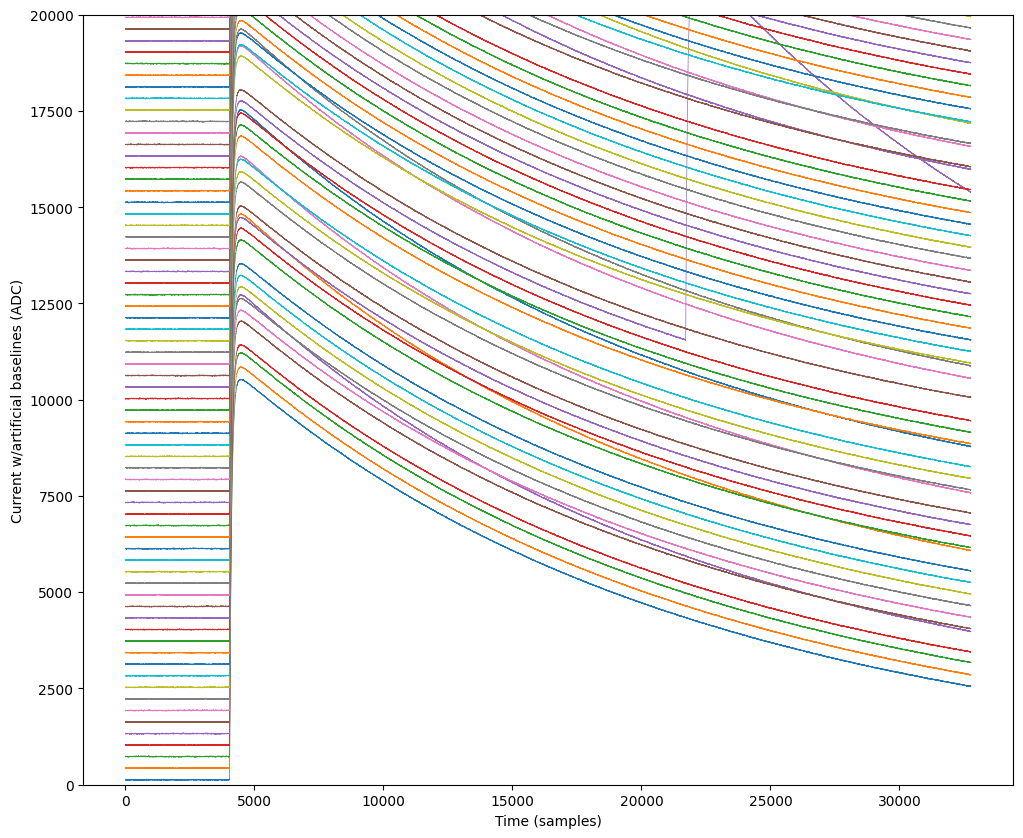

In [6]:
plot_from_csv('traces.csv', 0, 99)

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def filter_traces_by_avg(file_path, lower_bound=4700, upper_bound=5600, first_2048_lower=129, first_2048_upper=133):
    df = pd.read_csv(file_path, header=None)
    
    kept_traces = []
    kicked_traces = []
    first_2048_kicked_traces = []
    
    total_traces = len(df)
    
    for idx, row in df.iterrows():
        avg_value = row.mean()
        first_2048_avg = row[:2048].mean()
        
        if lower_bound <= avg_value <= upper_bound:
            if first_2048_lower <= first_2048_avg <= first_2048_upper:
                kept_traces.append((idx, avg_value, first_2048_avg))
            else:
                first_2048_kicked_traces.append((idx, avg_value, first_2048_avg))
        else:
            kicked_traces.append((idx, avg_value, first_2048_avg))
    
    passed_traces = len(kept_traces)
    cut_efficiency = passed_traces / total_traces if total_traces > 0 else 0
    
    print(f"Cut Efficiency: {cut_efficiency:.4f} ({passed_traces}/{total_traces})")

    
    print("\nKicked Traces (Overall Average Out of Bounds):")
    for trace in kicked_traces:
        print(f"Trace {trace[0]}: Average Value = {trace[1]:.2f}, First 2048 Avg = {trace[2]:.2f}")
    
    print("\nKicked Traces (First 2048 Avg Out of Bounds):")
    for trace in first_2048_kicked_traces:
        print(f"Trace {trace[0]}: Average Value = {trace[1]:.2f}, First 2048 Avg = {trace[2]:.2f}")


In [24]:
filter_traces_by_avg("traces.csv")

Cut Efficiency: 0.5300 (53/100)

Kicked Traces (Overall Average Out of Bounds):
Trace 24: Average Value = 7516.52, First 2048 Avg = 132.02
Trace 69: Average Value = 47588.59, First 2048 Avg = 128.93
Trace 70: Average Value = 7064.04, First 2048 Avg = 16702.68

Kicked Traces (First 2048 Avg Out of Bounds):
Trace 3: Average Value = 4926.21, First 2048 Avg = 128.45
Trace 4: Average Value = 5385.16, First 2048 Avg = 128.12
Trace 6: Average Value = 4926.40, First 2048 Avg = 128.06
Trace 7: Average Value = 4929.37, First 2048 Avg = 128.46
Trace 12: Average Value = 4939.48, First 2048 Avg = 133.02
Trace 14: Average Value = 4931.82, First 2048 Avg = 136.33
Trace 17: Average Value = 4941.72, First 2048 Avg = 135.06
Trace 19: Average Value = 4940.49, First 2048 Avg = 133.25
Trace 23: Average Value = 4935.86, First 2048 Avg = 128.81
Trace 26: Average Value = 5327.02, First 2048 Avg = 128.00
Trace 28: Average Value = 4928.29, First 2048 Avg = 127.53
Trace 29: Average Value = 4926.61, First 2048 Av